In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../../Water_Quality.csv.zip', compression='zip')

# Exploring the Data

In [26]:
# List of continuous and categorical features
continuous_features = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 
                       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 
                       'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature']
categorical_features = ['Color', 'Source', 'Month', 'Day', 'Time of Day', 'Target']

# Initialize a list to store the analysis results
details = []

# Analyze continuous features for min and max values
for feature in continuous_features:
    min_value = df[feature].min()
    max_value = df[feature].max()
    details.append({
        'Name': feature,
        'Data Type': 'Numerical',
        'Scale': 'Ratio',
        'Domain': f"{min_value} - {max_value}"
    })

# Analyze categorical features for all unique values
for feature in categorical_features:
    # Get all unique values as a list and then join them into a string for the 'Domain' field
    unique_values_list = df[feature].dropna().unique()
    unique_values_str = ', '.join(map(str, unique_values_list))
    details.append({
        'Name': feature,
        'Data Type': 'Categorical',
        'Scale': 'Nominal' if feature not in ['Month', 'Day', 'Time of Day'] else 'Ordinal',
        'Domain': unique_values_str
    })

# Convert the analysis results into a DataFrame
details_df = pd.DataFrame(details)

# Display the DataFrame
print(details_df)


                      Name    Data Type    Scale  \
0                       pH    Numerical    Ratio   
1                     Iron    Numerical    Ratio   
2                  Nitrate    Numerical    Ratio   
3                 Chloride    Numerical    Ratio   
4                     Lead    Numerical    Ratio   
5                     Zinc    Numerical    Ratio   
6                Turbidity    Numerical    Ratio   
7                 Fluoride    Numerical    Ratio   
8                   Copper    Numerical    Ratio   
9                     Odor    Numerical    Ratio   
10                 Sulfate    Numerical    Ratio   
11            Conductivity    Numerical    Ratio   
12                Chlorine    Numerical    Ratio   
13               Manganese    Numerical    Ratio   
14  Total Dissolved Solids    Numerical    Ratio   
15       Water Temperature    Numerical    Ratio   
16         Air Temperature    Numerical    Ratio   
17                   Color  Categorical  Nominal   
18          

# Data Quality Reports

### Create a Data Quality Report for Continuous Features

In [27]:
# Initialize an empty DataFrame for the data quality report
data_quality_records = []

# Calculate statistics for each continuous feature
for feature in continuous_features:
    col_data = df[feature]
    record = {
        'Feature': feature,
        'Count': col_data.count(),
        '% Missing': (col_data.isnull().sum() / len(col_data)) * 100,
        'Cardinality': col_data.nunique(),
        'Min': col_data.min(),
        'Q1': col_data.quantile(0.25),
        'Median': col_data.median(),
        'Q3': col_data.quantile(0.75),
        'Max': col_data.max(),
        'Mean': col_data.mean(),
        'Std Dev': col_data.std(),
    }
    data_quality_records.append(record)

# Create the DataFrame from the list of dictionaries
data_quality_report_continuous = pd.DataFrame(data_quality_records)

# Format the specified columns to round to 2 decimal places
columns_to_format = ['% Missing', 'Min', 'Q1', 'Median', 'Q3', 'Max', 'Mean', 'Std Dev']
data_quality_report_continuous[columns_to_format] = data_quality_report_continuous[columns_to_format].apply(lambda x: x.round(2))

# Save the Data Quality Report to a CSV file
data_quality_report_continuous.to_csv('quality_reports/continuous_features_report.csv', index=False)

# Display the Data Quality Report for Continuous Features
print(data_quality_report_continuous)


                   Feature    Count  % Missing  Cardinality    Min      Q1  \
0                       pH  1028344       1.93       996595   2.06    6.91   
1                     Iron  1041584       0.67       669099   0.00    0.00   
2                  Nitrate  1029880       1.78       998213   0.29    3.95   
3                 Chloride  1017741       2.94       986621  29.41  137.43   
4                     Lead  1043891       0.45       233165   0.00    0.00   
5                     Zinc  1020900       2.64       989688   0.00    0.41   
6                Turbidity  1039881       0.83       988790   0.00    0.04   
7                 Fluoride  1015357       3.17       984406   0.00    0.37   
8                   Copper  1013693       3.33       982372   0.00    0.13   
9                     Odor  1017243       2.99       986355   0.01    0.88   
10                 Sulfate  1014050       3.29       983313  11.94   97.46   
11            Conductivity  1019772       2.75       988666  13.

### Create a Data Quality Report for Categorical Features

In [28]:
# Initialize a list to store each row's dictionary
data_quality_records = []

# Calculate statistics for each categorical feature
for feature in categorical_features:
    col_data = df[feature].dropna()
    count = col_data.count()
    percent_missing = (df[feature].isnull().sum() / len(df[feature])) * 100
    cardinality = col_data.nunique()
    mode = col_data.mode()[0] if not col_data.mode().empty else 'N/A'
    mode_frequency = col_data.value_counts().iloc[0] if cardinality > 0 else 0
    mode_percentage = (mode_frequency / count * 100) if count > 0 else 0
    second_mode = col_data.value_counts().index[1] if cardinality > 1 else 'N/A'
    second_mode_frequency = col_data.value_counts().iloc[1] if cardinality > 1 else 0
    second_mode_percentage = (second_mode_frequency / count * 100) if count > 0 and cardinality > 1 else 0
    
    # Create a dictionary for each row and append it to the list
    data_quality_records.append({
        'Feature': feature,
        'Count': count,
        '% Missing': percent_missing,
        'Cardinality': cardinality,
        'Mode': mode,
        'Mode Freq.': mode_frequency,
        'Mode %': mode_percentage,
        '2nd Mode': second_mode,
        '2nd Mode Freq.': second_mode_frequency,
        '2nd Mode %': second_mode_percentage,
    })

# Convert the list of dictionaries to a DataFrame
data_quality_report_categorical = pd.DataFrame(data_quality_records)

# Format the specified columns to round to 2 decimal places
columns_to_format = ['% Missing', 'Mode %', '2nd Mode %']
data_quality_report_categorical[columns_to_format] = data_quality_report_categorical[columns_to_format].apply(lambda x: x.round(2))

# Save the Data Quality Report to a CSV file
data_quality_report_categorical.to_csv('quality_reports/categorical_features_report.csv', index=False)

# Display the Data Quality Report for Categorical Features
print(data_quality_report_categorical)


       Feature    Count  % Missing  Cardinality       Mode  Mode Freq.  \
0        Color  1047594       0.09            5  Colorless      326033   
1       Source  1033040       1.48            8       Well      129654   
2        Month  1031654       1.61           12    January       88217   
3          Day  1031026       1.67           31       25.0       34192   
4  Time of Day  1028214       1.94           24        0.0       43267   
5       Target  1048575       0.00            2          0      807841   

   Mode %        2nd Mode  2nd Mode Freq.  2nd Mode %  
0   31.12  Near Colorless          325799       31.10  
1   12.55         Aquifer          129609       12.55  
2    8.55          August           87855        8.52  
3    3.32            10.0           34168        3.31  
4    4.21             5.0           43124        4.19  
5   77.04               1          240734       22.96  


# Visualizing Features

### Visualizing Continuous Features

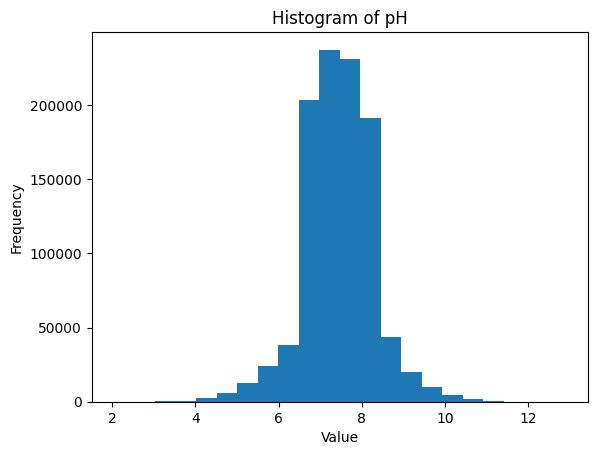

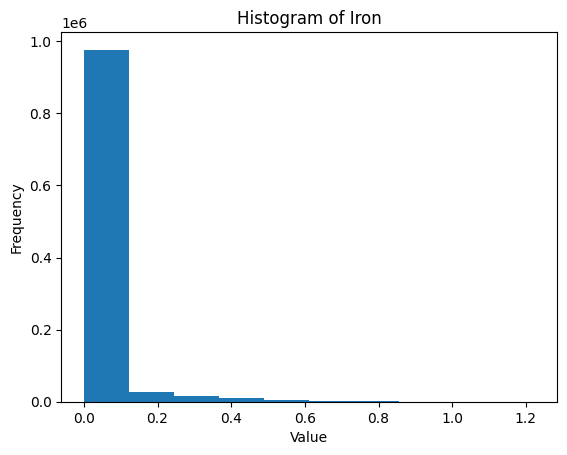

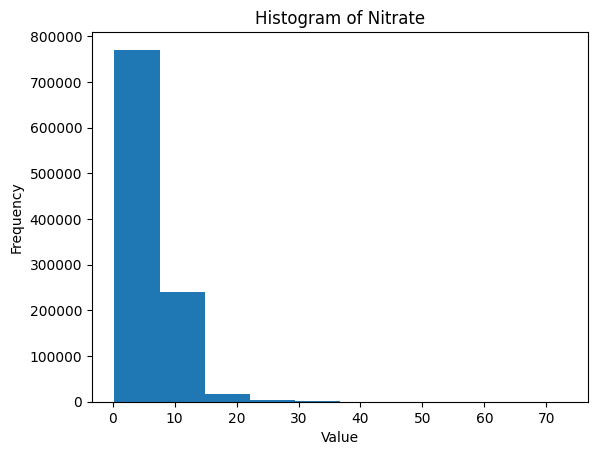

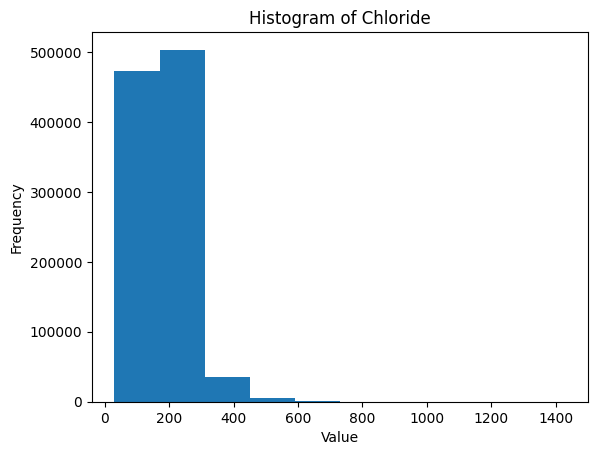

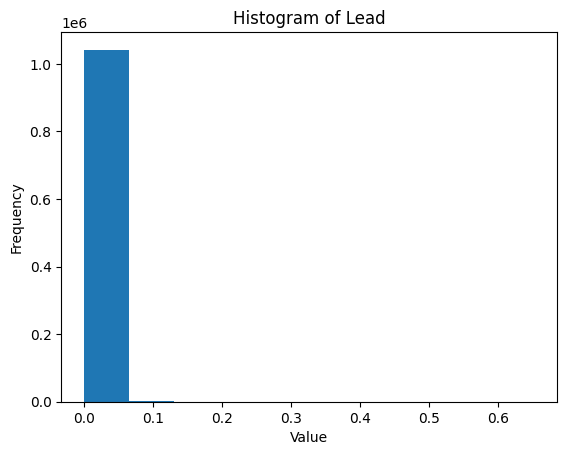

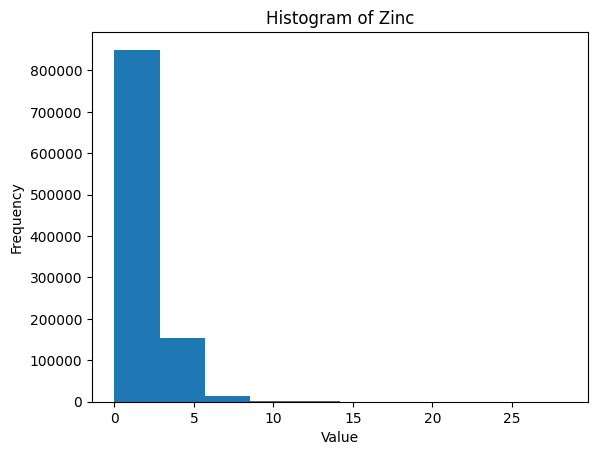

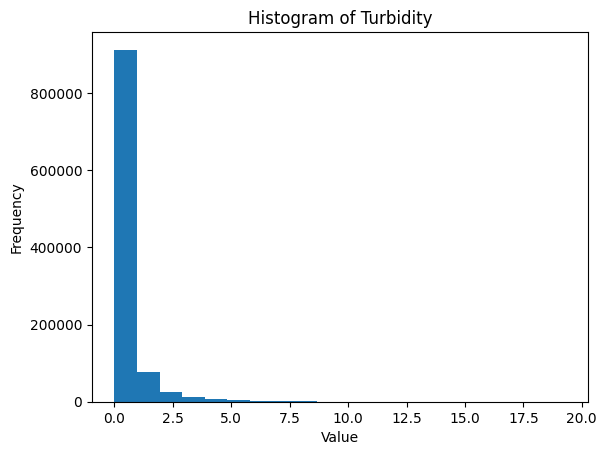

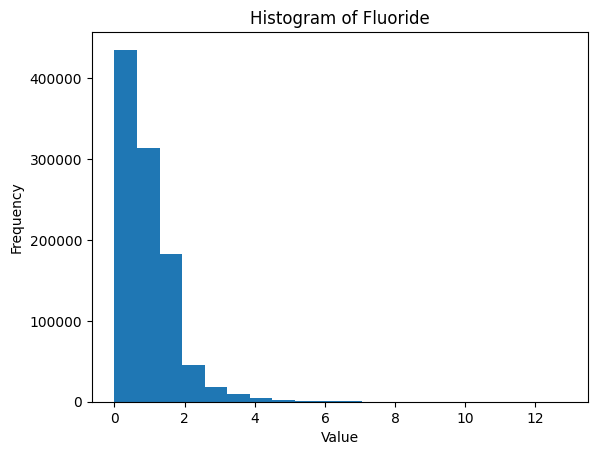

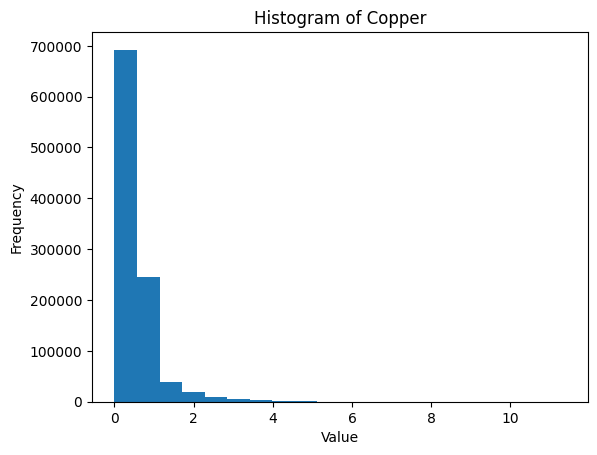

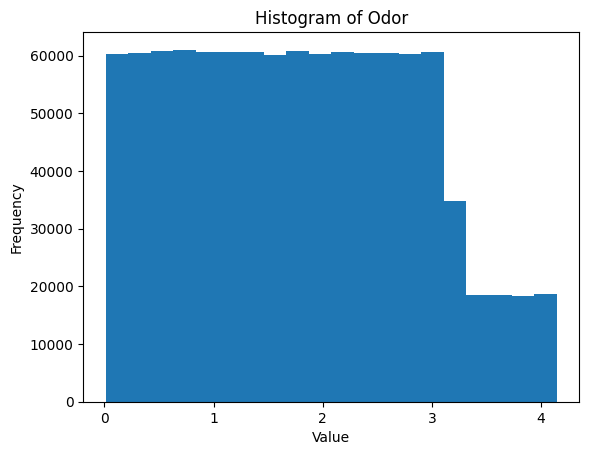

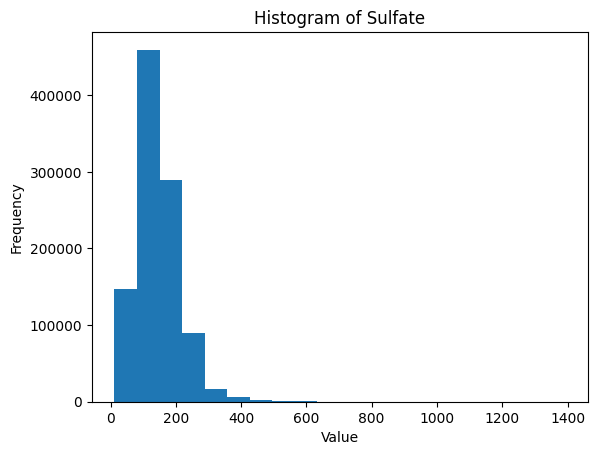

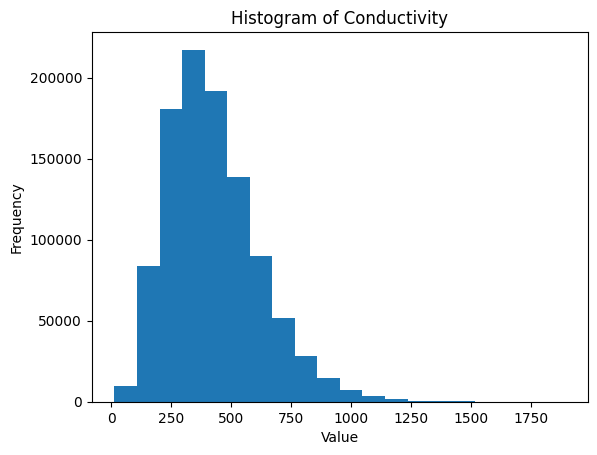

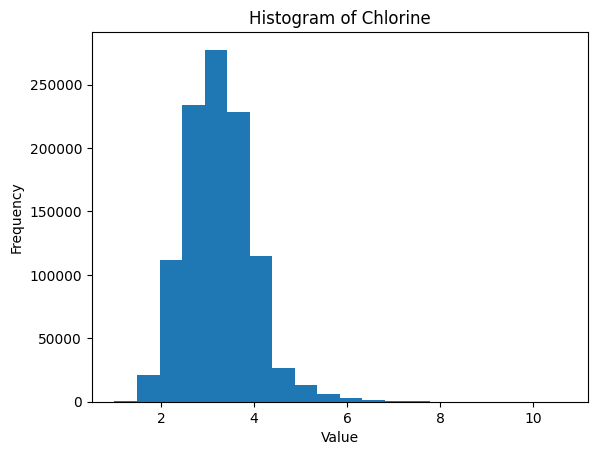

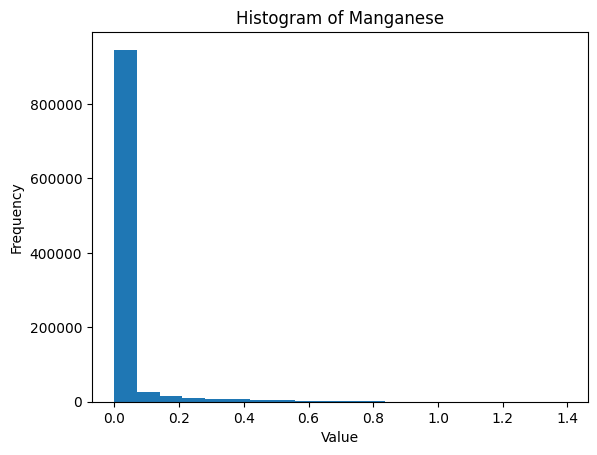

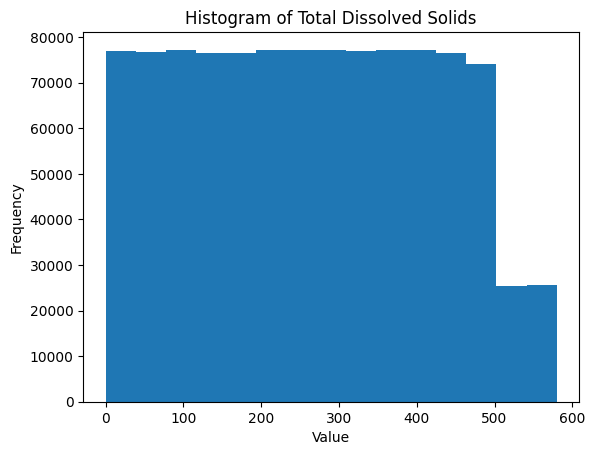

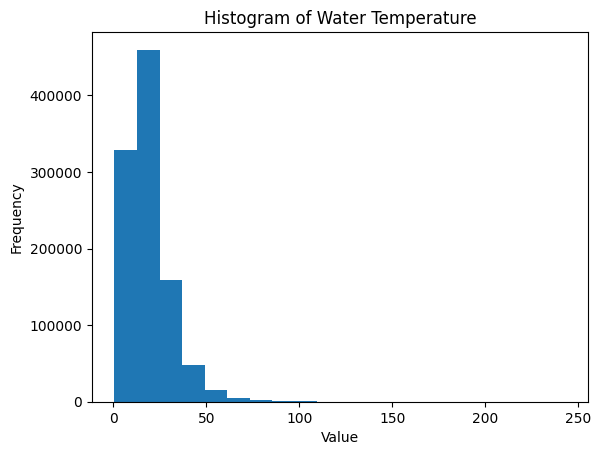

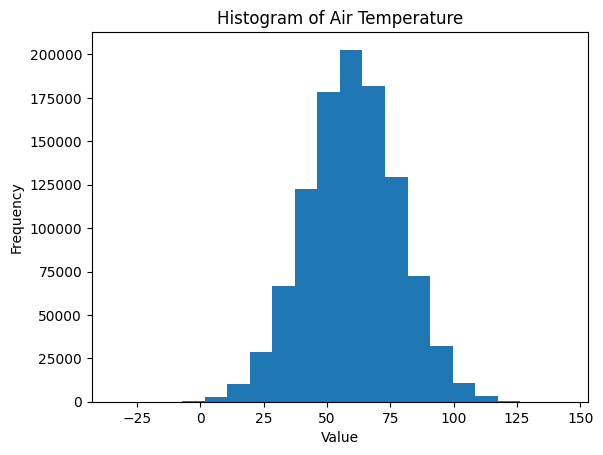

In [29]:
# Histograms
# disable SettingWithCopyWarning which flags every time we performed an operation on the dataframe's column
pd.options.mode.chained_assignment = None  

# Make a list for number of bins for each feature
count = 0
bin_list = [22,10,10,10,10,10,20,20,20,20,20,20,20,20,15,20,20,20]

# Create histograms for each continuous feature
for feature in continuous_features:
    if feature in df.columns:
        # Create a copy to avoid changing the original data
        data = df[feature].copy()

        # Apply log(10) function to severely skewed distributions, adding 1 to avoid log(0)
        if feature in ['Manganese', 'Iron', 'Lead']:
            data += 1
            data = np.log10(data)
        
        plt.hist(data, bins=bin_list[count])
        plt.title(f'Histogram of {feature}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        # Uncomment next 
        # plt.savefig(f'images/histograms/{feature}')
        plt.show()
        count += 1

### Visualizing Categorical Features

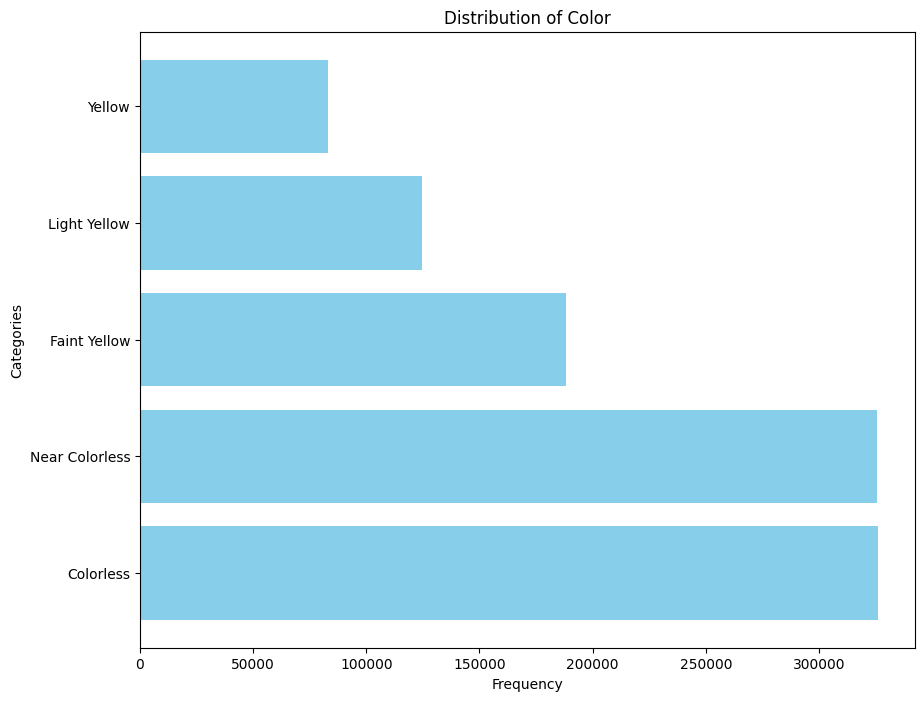

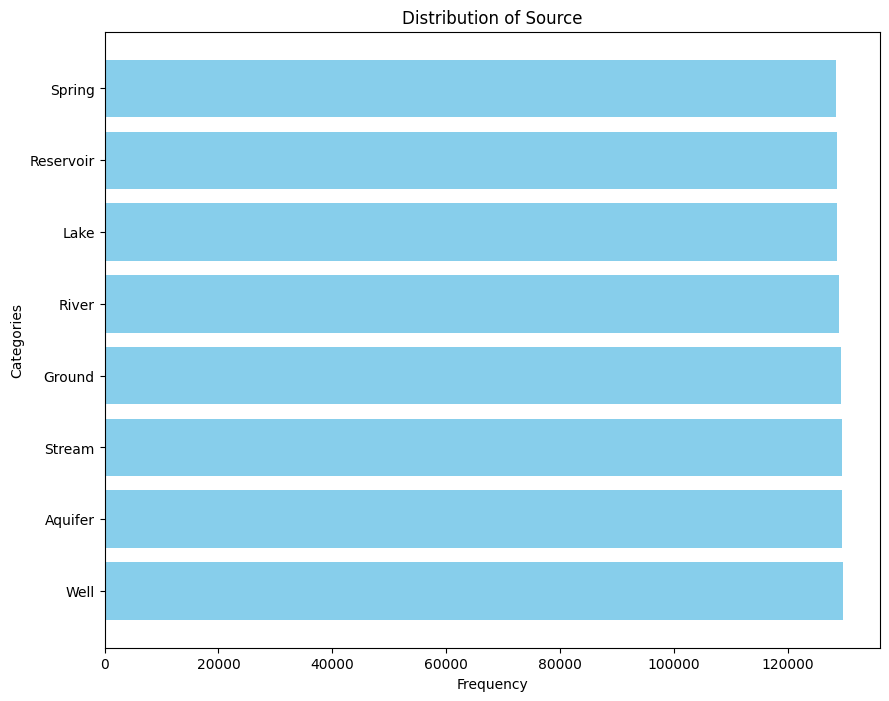

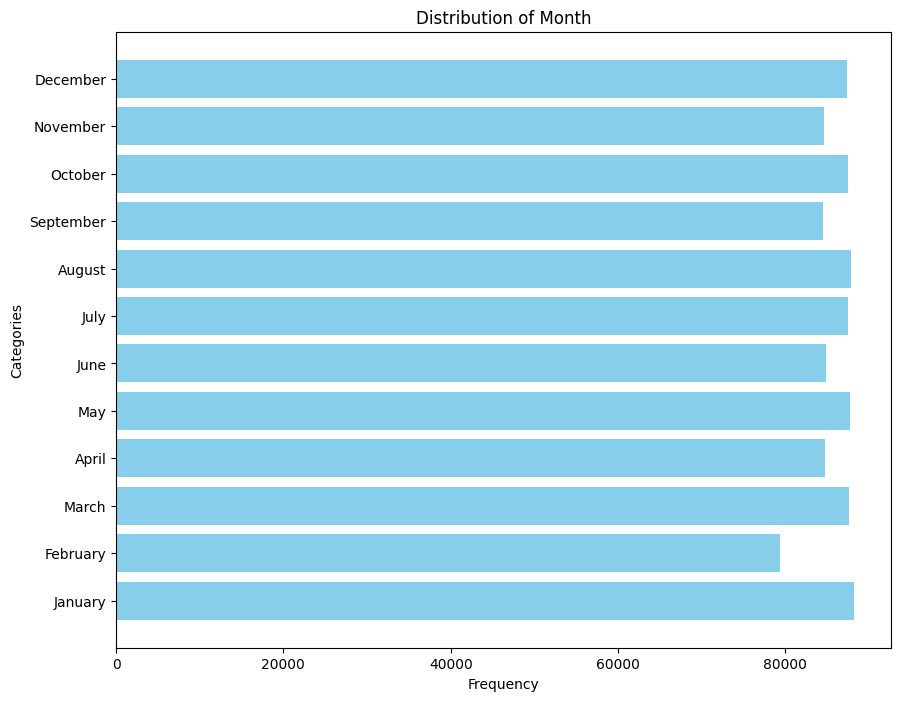

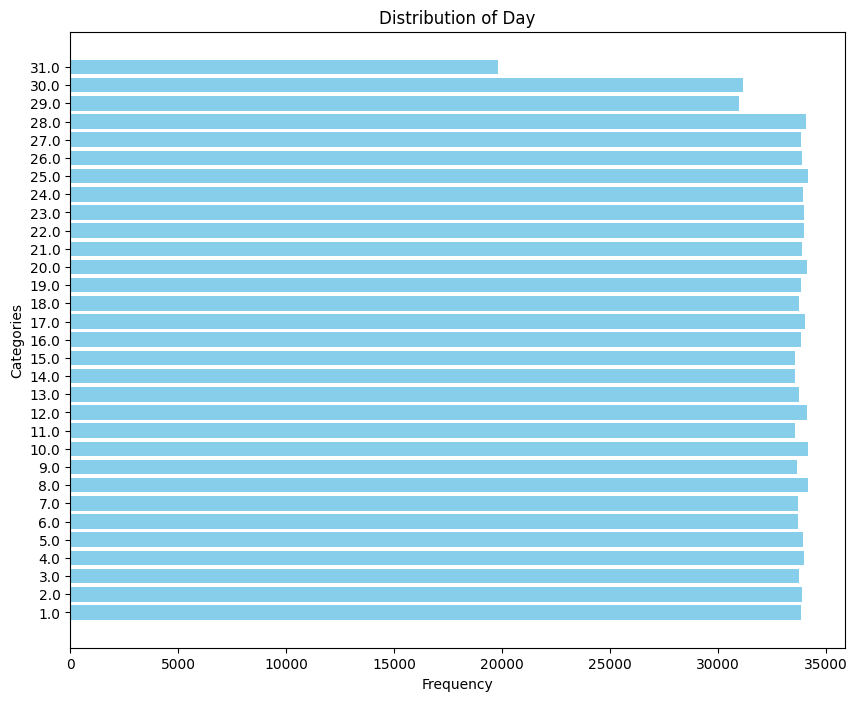

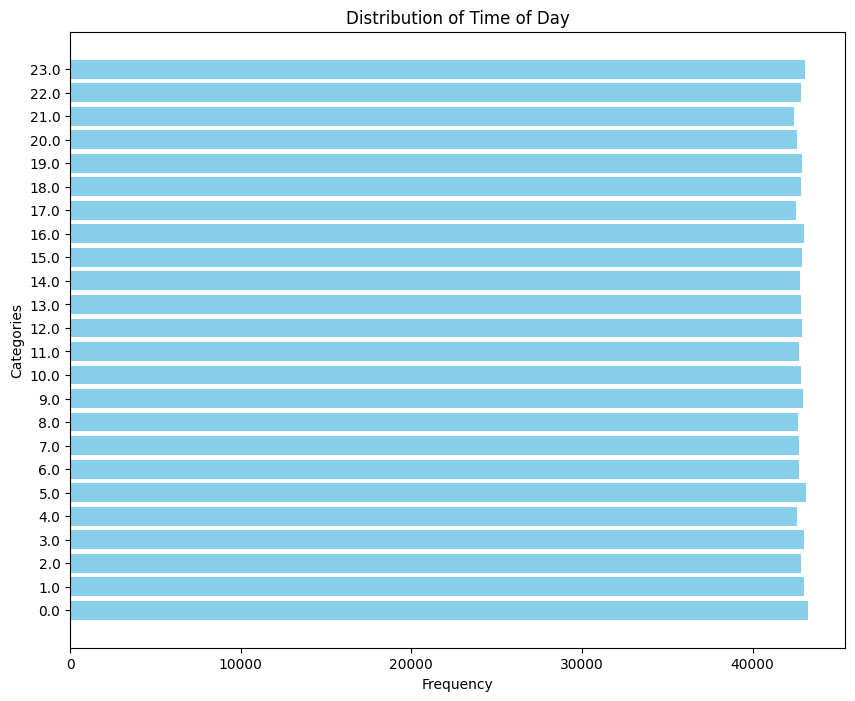

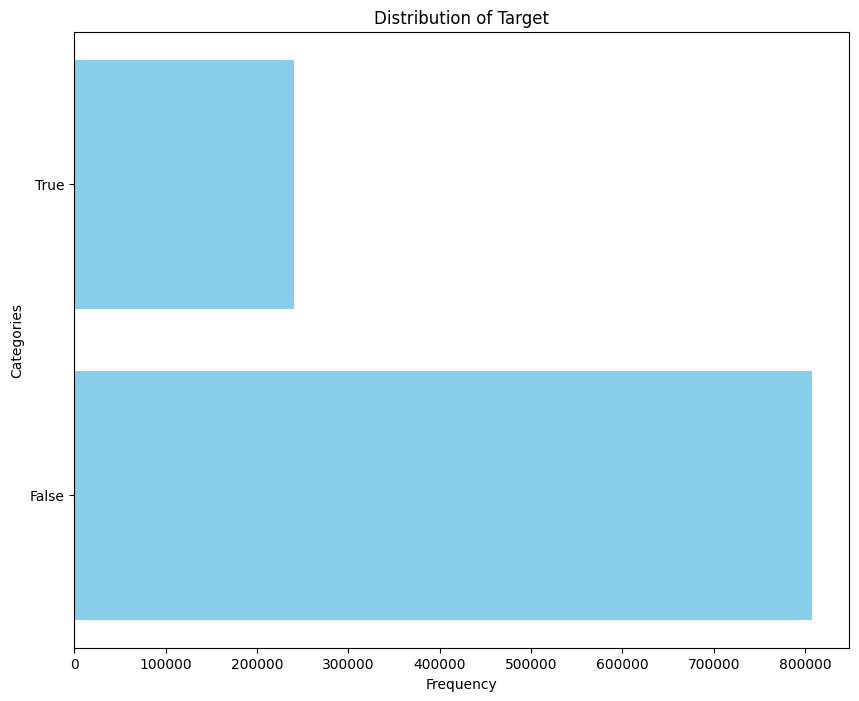

In [132]:
# Bar Plots
plot_copy = df.copy()

# Change target feature to True/False
plot_copy['Target'] = plot_copy['Target'].map({0: False, 1: True})


# Mapping for months to sort them chronologically
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Iterate through each categorical feature
for feature in categorical_features:
    if feature in plot_copy.columns:
        if feature == 'Month':
            # Sort 'Month' by chronological order
            category_counts = plot_copy[feature].map(month_order).value_counts().sort_index()
            # Map back to month names for plotting
            category_counts.index = category_counts.index.map({v: k for k, v in month_order.items()})
        elif feature in ['Day', 'Time of Day']:
            # Sort 'Day' and 'Time of Day' by their natural order
            category_counts = plot_copy[feature].value_counts().sort_index()
        else:
            # For other features, sort by frequency
            category_counts = plot_copy[feature].value_counts()

        # Create a horizontal bar plot
        plt.figure(figsize=(10, 8))
        plt.barh(category_counts.index.astype(str), category_counts.values, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel('Frequency')
        plt.ylabel('Categories')
        # Uncomment the next line to save the plot as an image
        plt.savefig(f'images/bar_plots/{feature}')
        plt.show()
# # Iterate through each categorical feature
# for feature in categorical_features:
#     if feature in plot_copy.columns:
#         # Calculate the frequency of each category
#         category_counts = plot_copy[feature].value_counts()
        
#         # Create a horizontal bar plot
#         plt.figure(figsize=(10, 8))
#         plt.barh(category_counts.index.astype(str), category_counts.values, color='skyblue')
#         plt.title(f'Distribution of {feature}')
#         plt.xlabel('Frequency')
#         plt.ylabel('Categories')
#         # Uncomment the next line to save the plot as an image
#         # plt.savefig(f'images/bar_plots/{feature}')
#         plt.show()

# Outliers


### IQR Outliers

In [31]:
# outlier_copy = df.copy()

# def calculate_iqr_bounds_and_outliers(df, feature):
#     Q1 = df[feature].quantile(0.25)
#     Q3 = df[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = round(Q1 - 1.5 * IQR, 4)
#     upper_bound = round(Q3 + 1.5 * IQR, 4)
#     outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
#     return (lower_bound, upper_bound), outliers.shape[0]

# outliers_df = pd.DataFrame(columns=['Feature', 'IQR Bounds', 'Number of Outliers'])

# # Loop through each feature to detect outliers and store the results in the DataFrame
# for feature in continuous_features:
#     bounds, num_outliers = calculate_iqr_bounds_and_outliers(outlier_copy, feature)
#     new_row = pd.DataFrame({'Feature': [feature], 'IQR Bounds': [bounds], 'Number of Outliers': [num_outliers]})
#     outliers_df = pd.concat([outliers_df, new_row], ignore_index=True)

# # Display the resulting DataFrame
# print(outliers_df)

In [32]:
# # Showing boxplots
# for feature in continuous_features:
#     plt.figure(figsize=(8, 4))
#     outlier_copy[feature].plot(kind='box', vert=False)
#     plt.title(feature)
#     plt.show()

### Z-Score Outliers

In [33]:
# from scipy import stats

# outliers_count_zscore = pd.DataFrame(columns=['Feature', 'Number of Outliers'])
# for feature in continuous_features:
#     outlier_copy[feature + '_zscore'] = stats.zscore(outlier_copy[feature], nan_policy='omit')
#     num_outliers = outlier_copy[(outlier_copy[feature + '_zscore'] > 3) | (outlier_copy[feature + '_zscore'] < -3)].shape[0]
#     new_row = pd.DataFrame({'Feature': [feature], 'Number of Outliers': [num_outliers]})
#     outliers_count_zscore = pd.concat([outliers_count_zscore, new_row], ignore_index=True)

# print(outliers_count_zscore)


In [34]:
# for feature in continuous_features:
#     outlier_copy[feature + '_zscore'] = stats.zscore(outlier_copy[feature], nan_policy='omit')

#     plt.figure(figsize=(10, 6))

#     plt.scatter(range(len(outlier_copy)), outlier_copy[feature + '_zscore'], color='blue', edgecolor='k', label='Data Points')

#     outliers = outlier_copy[(outlier_copy[feature + '_zscore'] > 3) | (outlier_copy[feature + '_zscore'] < -3)]
#     plt.scatter(outliers.index, outliers[feature + '_zscore'], color='red', label='Outliers')

#     plt.axhline(3, color='red', linestyle='dashed', linewidth=2)
#     plt.axhline(-3, color='red', linestyle='dashed', linewidth=2)

#     plt.title(f'Scatter Plot of Z-scores for {feature}')
#     plt.xlabel('Index')
#     plt.ylabel('Z-score')
#     plt.legend()

#     plt.show()

### Log Outliers

In [35]:
# log_outliers_df = pd.DataFrame(columns=['Feature', 'Number of Outliers'])

# def detect_outliers_log(df, feature):
#     transformed = np.log1p(df[feature])

#     z_scores = np.abs(stats.zscore(transformed, nan_policy='omit'))

#     num_outliers = np.sum(z_scores > 3)
#     return num_outliers

# for feature in continuous_features:
#     num_outliers = detect_outliers_log(outlier_copy, feature)
#     new_row = pd.DataFrame({'Feature': [feature], 'Number of Outliers': [num_outliers]})
#     log_outliers_df = pd.concat([log_outliers_df, new_row], ignore_index=True)

# print(log_outliers_df)

In [36]:
# for feature in continuous_features:
#     plt.figure(figsize=(12, 6))

#     # Original data plot
#     plt.subplot(1, 2, 1)
#     plt.boxplot(outlier_copy[feature].dropna(), vert=False)  # Drop NA for valid boxplot
#     plt.title(f'Original {feature}')
#     plt.xlabel(feature)

#     # Log-transformed data plot
#     plt.subplot(1, 2, 2)
#     transformed_data = np.log1p(outlier_copy[feature])  # Log-transform the feature
#     plt.boxplot(transformed_data.dropna(), vert=False)  # Drop NA for valid boxplot
#     plt.title(f'Log-transformed {feature}')
#     plt.xlabel(f'Log-transformed {feature}')

#     # Show the figure
#     plt.tight_layout()  # Adjust layout for better readability
#     plt.show()


### Outlier Removal

In [37]:
# creating a copy of the df so the orginal is not effected
outlier_removal_df = df.copy()

# creating lists for distributions of the different features
normal_features = ['pH', 'Air Temperature', 'Chlorine',]
exponential_features = ['Iron', 'Zinc', 'Turbidity', 'Fluoride', 'Copper', 'Manganese']
left_skewed_features = ['Nitrate', 'Chloride', 'Sulfate', 'Conductivity', 'Water Temperature']
uniform_features = ['Odor', 'Total Dissolved Solids']

# Function that removes outliers based on given percentages
def remove_outliers(df, feature, lower_percentage, upper_percentage):
    lower_bound = np.nanpercentile(df[feature], lower_percentage)
    upper_bound = np.nanpercentile(df[feature], upper_percentage)
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# removing 0.15% from tails in normal distribution
for feature in normal_features:
    outlier_removal_df = remove_outliers(outlier_removal_df, feature, 0.15, 99.85)

# removing 2.5% from the right tail for exponential distribution
for feature in exponential_features:
    outlier_removal_df = remove_outliers(outlier_removal_df, feature, 0, 97.5)

# removing 1% from left tail and 2% from right tail for left skewed distribution
for feature in left_skewed_features:
    outlier_removal_df = remove_outliers(outlier_removal_df, feature, 1, 98)

# removing 0.1% from each side for uniform distribution
for feature in uniform_features:
    outlier_removal_df = remove_outliers(outlier_removal_df, feature, 0.1, 99.9)


# showing before and after
print("Before outlier removal:")
print(df.describe())

print("After outlier removal:")
print(outlier_removal_df.describe())

           Feature  Number of Outliers Removed
0               pH                       32993
1          Sulfate                       46774
2     Conductivity                       35219
3         Chlorine                       18066
4  Air Temperature                        7134
                   Feature             IQR Bounds Number of Outliers Removed
0                     Iron      (-0.0722, 0.1203)                     150222
1                  Nitrate       (-1.4076, 12.84)                      32707
2                 Chloride    (22.5721, 326.4647)                      38837
3                     Zinc       (-2.2551, 4.851)                      34676
4                Turbidity       (-0.727, 1.3035)                      39512
5                 Fluoride       (-0.9902, 2.611)                      31660
6                   Copper      (-0.6409, 1.3854)                      35802
7                     Odor      (-1.6405, 4.9687)                      16338
8                Manganes

# Missing Values

### Identify Missing Values

In [38]:
# Calculate missing values count and percentage for each feature
missing_values_count = outlier_copy.isnull().sum()
missing_values_percentage = (outlier_copy.isnull().sum() / len(df)) * 100

# Create a DataFrame from the calculated series
missing_summary_df = pd.DataFrame({
    'Feature': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Missing Values (%)': missing_values_percentage.values
})

# Display the DataFrame
print(missing_summary_df)

                   Feature  Missing Values  Missing Values (%)
0                       pH               0            0.000000
1                     Iron               0            0.000000
2                  Nitrate               0            0.000000
3                 Chloride               0            0.000000
4                     Zinc               0            0.000000
5                    Color             401            0.038242
6                Turbidity               0            0.000000
7                 Fluoride               0            0.000000
8                   Copper               0            0.000000
9                     Odor               0            0.000000
10                 Sulfate               0            0.000000
11            Conductivity               0            0.000000
12                Chlorine               0            0.000000
13               Manganese               0            0.000000
14  Total Dissolved Solids               0            0

### Impute Missing Values

In [39]:
from sklearn.impute import SimpleImputer

continuous_features = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Zinc', 'Turbidity', 
                            'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 
                            'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature']

def impute_missing_values(df):
    # Create imputers
    numerical_imputer = SimpleImputer(strategy='median')
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    
    # Impute missing values
    df[continuous_features] = numerical_imputer.fit_transform(df[continuous_features])
    df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])
    
    return df

# Impute missing values in the DataFrame & verify the changes
df_imputed = impute_missing_values(outlier_copy.copy())

print(df_imputed.isnull().sum())


pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64


# Normalization

In [40]:
from sklearn.preprocessing import RobustScaler
# Initializes RobustScaler
scaler = RobustScaler()

# Makes copy of df
normalized_df = df_imputed.copy()

# Robust scaling of all continuous features
for feature in continuous_features:
    column_data = normalized_df[[feature]]
    scaled_data = scaler.fit_transform(column_data)
    normalized_df[feature] = scaled_data

print(normalized_df.head(20))

          pH      Iron   Nitrate  Chloride      Zinc           Color  \
0  -0.569256 -0.035303 -0.495459  0.806005  0.132335    Faint Yellow   
1   0.650220  0.136995  1.358456  0.239326  1.662092    Light Yellow   
2  -0.215746 -0.041950  1.159606  0.179164 -0.362523       Colorless   
3  -0.379396  0.207340 -0.529451 -0.173510 -0.543717       Colorless   
4   0.353959 -0.041950  1.010502 -1.122302 -0.251837  Near Colorless   
5   0.150684  5.738423  0.628347 -0.008918  1.325170  Near Colorless   
6  -0.514828 -0.037194  0.629449 -0.539399 -0.566644  Near Colorless   
7   0.600369 -0.041950 -0.459936  0.174684  0.010647    Light Yellow   
8  -0.799271  0.257571 -0.481087  0.193469  0.219395  Near Colorless   
9  -0.593619 -0.041688  0.006669 -0.093741 -0.278547    Faint Yellow   
10 -0.218541  0.169750  0.867180 -0.503599  0.528725  Near Colorless   
11 -0.627821  1.922561 -0.727702  0.080461 -0.381344  Near Colorless   
12 -0.473217 -0.041950  1.058428 -0.849021  0.884372    Light Ye

# Random Sampling

In [41]:
sampled_df = normalized_df.copy().sample(frac=0.5, random_state=42)

sampled_df.to_csv("../../preprocessed_dataset/preprocessed_dataset.csv")

sampled_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 202904 entries, 142972 to 373143
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      202904 non-null  float64
 1   Iron                    202904 non-null  float64
 2   Nitrate                 202904 non-null  float64
 3   Chloride                202904 non-null  float64
 4   Zinc                    202904 non-null  float64
 5   Color                   202904 non-null  object 
 6   Turbidity               202904 non-null  float64
 7   Fluoride                202904 non-null  float64
 8   Copper                  202904 non-null  float64
 9   Odor                    202904 non-null  float64
 10  Sulfate                 202904 non-null  float64
 11  Conductivity            202904 non-null  float64
 12  Chlorine                202904 non-null  float64
 13  Manganese               202904 non-null  float64
 14  Total Dissolved Soli